In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import math



In [2]:
#Size of our input images
SIZE = 128

# Setting the training and testing datasets 

ImageDataGenerator.flow_from_directory: Takes the path to a directory and generates batches of augmented data.

In [4]:
batch_size = 64
datagen = ImageDataGenerator(rescale=1./255) # Typically used for data augmentation. Here it is only rescaling the image pixels value to range 0 to 1 in decimals

train_generator = datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Positive/",
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'          # Class used for working with Autoencoders
    )

Found 179 images belonging to 1 classes.


In [5]:
validation_generator = datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Positive_val/",
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )


Found 30 images belonging to 1 classes.


In [6]:
anomaly_generator = datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Anomalies/",
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )


Found 6 images belonging to 1 classes.


# Checking the generators

See the sizes of each generator. Notice that the last one, does not contain any sample because we do not have negative samples, that is anomalies.

In [7]:
print("The training dataset has size: ", len(train_generator))
print("The training dataset has size: ", len(validation_generator))
print("The training dataset has size: ", len(anomaly_generator))

The training dataset has size:  3
The training dataset has size:  1
The training dataset has size:  1


The sizes above shown correspond to the number of bathces each of the generator contains. Recall that each batch size is of 64 elements.

## Iterating over the generators

In [7]:
batch_iterator = train_generator.next()
print(type(batch_iterator))
print(len(batch_iterator))
# print(batch_iterator)

<class 'tuple'>
2


As one batch length is of two. Let's see what each of these two elements consist of.

In [8]:
first_element = batch_iterator[0]
second_element = batch_iterator[1]
print(type(first_element))
print(first_element.shape)
print("******************")
print(type(second_element))
print(second_element.shape)

<class 'numpy.ndarray'>
(64, 128, 128, 3)
******************
<class 'numpy.ndarray'>
(64, 128, 128, 3)


See that each of the elements correspond to a "group" of 51 or 64 elements, where there are data of images of shape (128, 128) and finally each of these elements consist of 3 channels.

The curious part is that depending on which batch of the generator is chosen (executing the code that has the "next()" function) the length of the elements of contained in that batch vary between 51 and 64. It was expected always it to be 64, because it was set the batch size to be of 64 elements. 

Moreover, another question is: why when retrieving a batch, this one contains two elements? It was expected only to be one single element. 


This is another way to use the "next()" function.

In [9]:
batch_iterator2 = next(train_generator)
print(type(batch_iterator2))
print(len(batch_iterator2))

<class 'tuple'>
2


And also another way to directly enter one of the elements contained in the retrieved batch.

In [10]:
batch_iterator2 = next(train_generator)[1]
print(type(batch_iterator2))
print(batch_iterator2.shape)


<class 'numpy.ndarray'>
(51, 128, 128, 3)


In [11]:
for i in range(1):
    aux = next(train_generator)[0]
    print(type(aux))
    print(aux.shape)
    print(len(aux))


<class 'numpy.ndarray'>
(64, 128, 128, 3)
64


What "astype()" above does, is simply to convery the image data matrix from float values to be integers.

Now we will show the images contained in the batches.

Showing the images contained in only one batch. And from this batch, showing the images contained in both of its elements. The first element images are shown below:

Selecting batch number:  0
This is the element number 1 of the batch
The length of this element batch is:  64


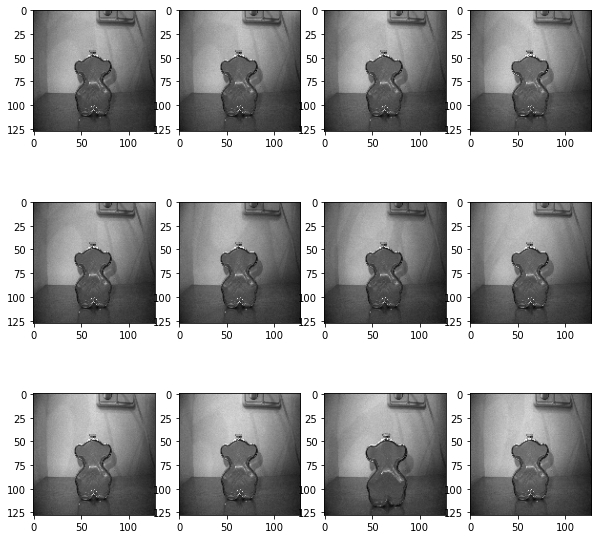

In [12]:
plt.figure(figsize=(10, 10))
for j in range(1):                        # Itertaing over ONLY the first batch
    print("Selecting batch number: ",j)
    batch_iterator = train_generator.next()
    first_element_batch = batch_iterator[0]
    second_element_batch = batch_iterator[1]
    print("This is the element number 1 of the batch")
    print("The length of this element batch is: ", len(first_element_batch))
    for i in range(12):                         # Showing ONLY the first 12 samples of the batch
        plt.subplot(3, 4, i + 1)
        plt.imshow(first_element_batch[i])

And now, the second element images:

Selecting batch number:  0
This is the element number 2 of the batch
The length of this element batch is:  64


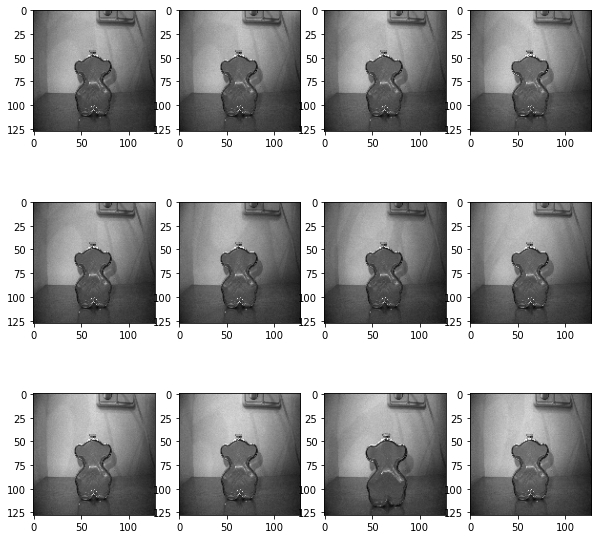

In [13]:
plt.figure(figsize=(10, 10))
for j in range(1):                        # Itertaing over ONLY the first batch
    print("Selecting batch number: ",j)
    print("This is the element number 2 of the batch")
    print("The length of this element batch is: ", len(second_element_batch))
    for i in range(12):                         # Showing ONLY the first 12 samples of the batch
        plt.subplot(3, 4, i + 1)
        plt.imshow(second_element_batch[i])

Here, showing the images from the first and second element of the batch side by side.

Selecting batch number:  0
The length of this element batch is:  51


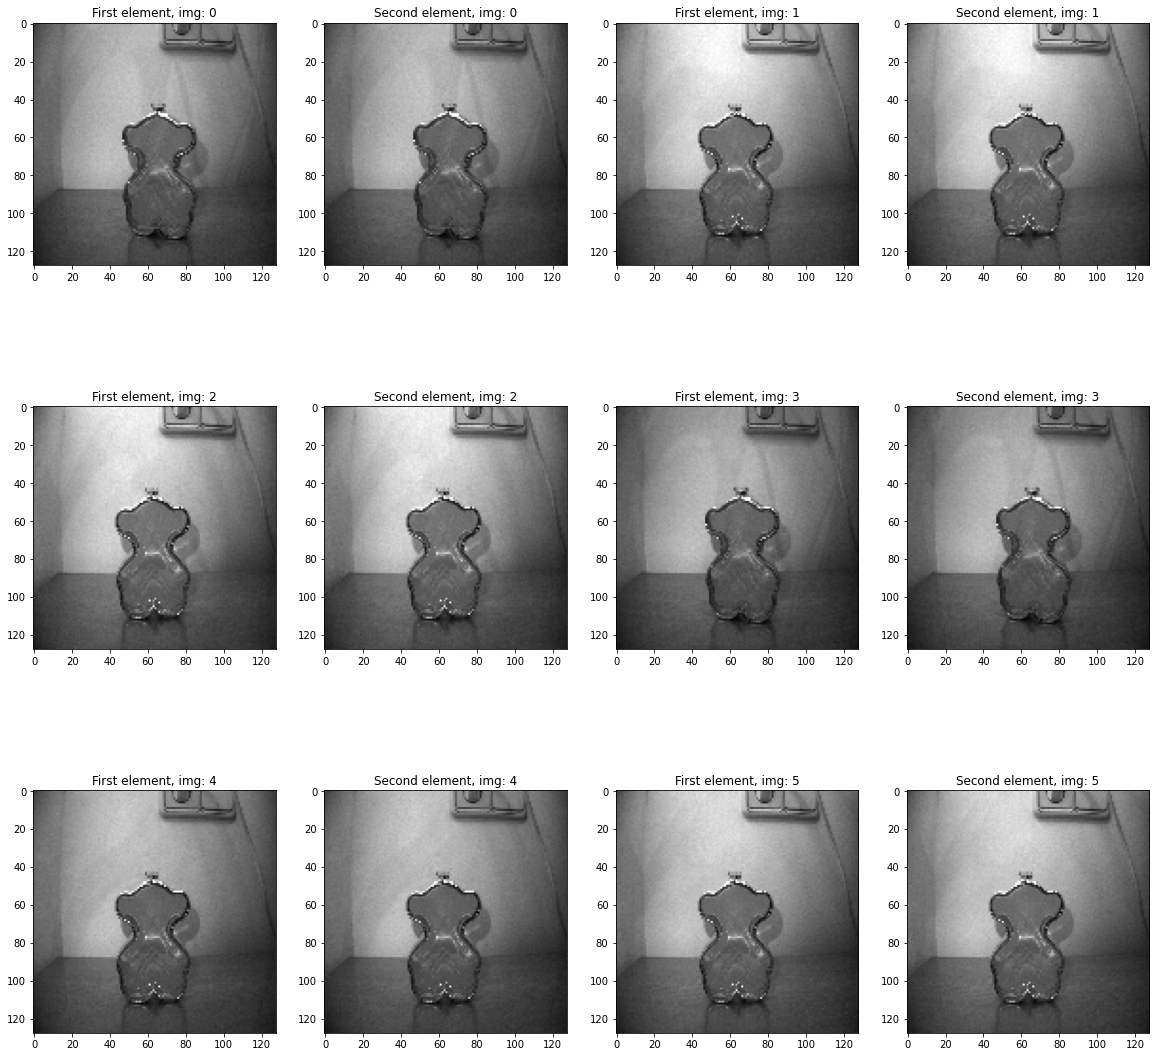

In [14]:
plt.figure(figsize=(20, 20))
for j in range(1):                        # Itertaing over ONLY the first batch
    print("Selecting batch number: ",j)
    batch_iterator = train_generator.next()
    first_element_batch = batch_iterator[0]
    second_element_batch = batch_iterator[1]
    print("The length of this element batch is: ", len(first_element_batch))
    image_to_show = 0
    for i in range(12):                         # Showing ONLY the first 12 samples of the batch
        plt.subplot(3, 4, i + 1)
        if (i % 2 == 0):
            plt.imshow(first_element_batch[image_to_show])
            plt.title("First element, img: %i" %image_to_show)
        else:
            plt.imshow(second_element_batch[image_to_show])
            plt.title("Second element, img: %i" %image_to_show)
            image_to_show = image_to_show+1


See that the images of each element of the batch are pretty similar, if not the same. This might be due to the fact that the image generator function only rescales the image pixels to float values ranging from 0 to 1. 

<code> datagen = ImageDataGenerator(rescale=1./255) # Typically used for data augmentation. Here it is only rescaling the image pixels value to range 0 to 1 in decimals </code>


Next, it is interesting to know until which point the next() function of the DataGeneration class can go.

In [15]:
print("The size of the train generator is: ", len(train_generator))

The size of the train generator is:  3


In [16]:
print("The current index of the train generator is: ", train_generator.batch_index)

The current index of the train generator is:  0


In [17]:
i = 0
for batch_iterator in range(7):
    print("The current index of the train generator is: ", train_generator.batch_index)
    train_generator.next()
    print("External counter is: ", i)
    i=i+1
    print("\n")

The current index of the train generator is:  0
External counter is:  0


The current index of the train generator is:  1
External counter is:  1


The current index of the train generator is:  2
External counter is:  2


The current index of the train generator is:  0
External counter is:  3


The current index of the train generator is:  1
External counter is:  4


The current index of the train generator is:  2
External counter is:  5


The current index of the train generator is:  0
External counter is:  6




From above, it can be seen that the "next()" function works as expected. It iterates over the possible indexes it can take.

## Trying with augmented data 

It was believed that the first and second element of the batch are the same image because the data augmentation that we had for the example consisted only on rescaling the pixel values. In this section different data augmentation will be tested.

In [18]:
batch_size = 64
datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True) # Typically used for data augmentation. Here it is  rescaling the image pixels value to range 0 to 1 in decimals and applying horizontal and vertical flip

train_generator = datagen.flow_from_directory(
    "../../Images/BottleStoodUp_atNight/Positive/",
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'          # Class used for working with Autoencoders
    )


Found 179 images belonging to 1 classes.


Selecting batch number:  0
The length of this element batch is:  64


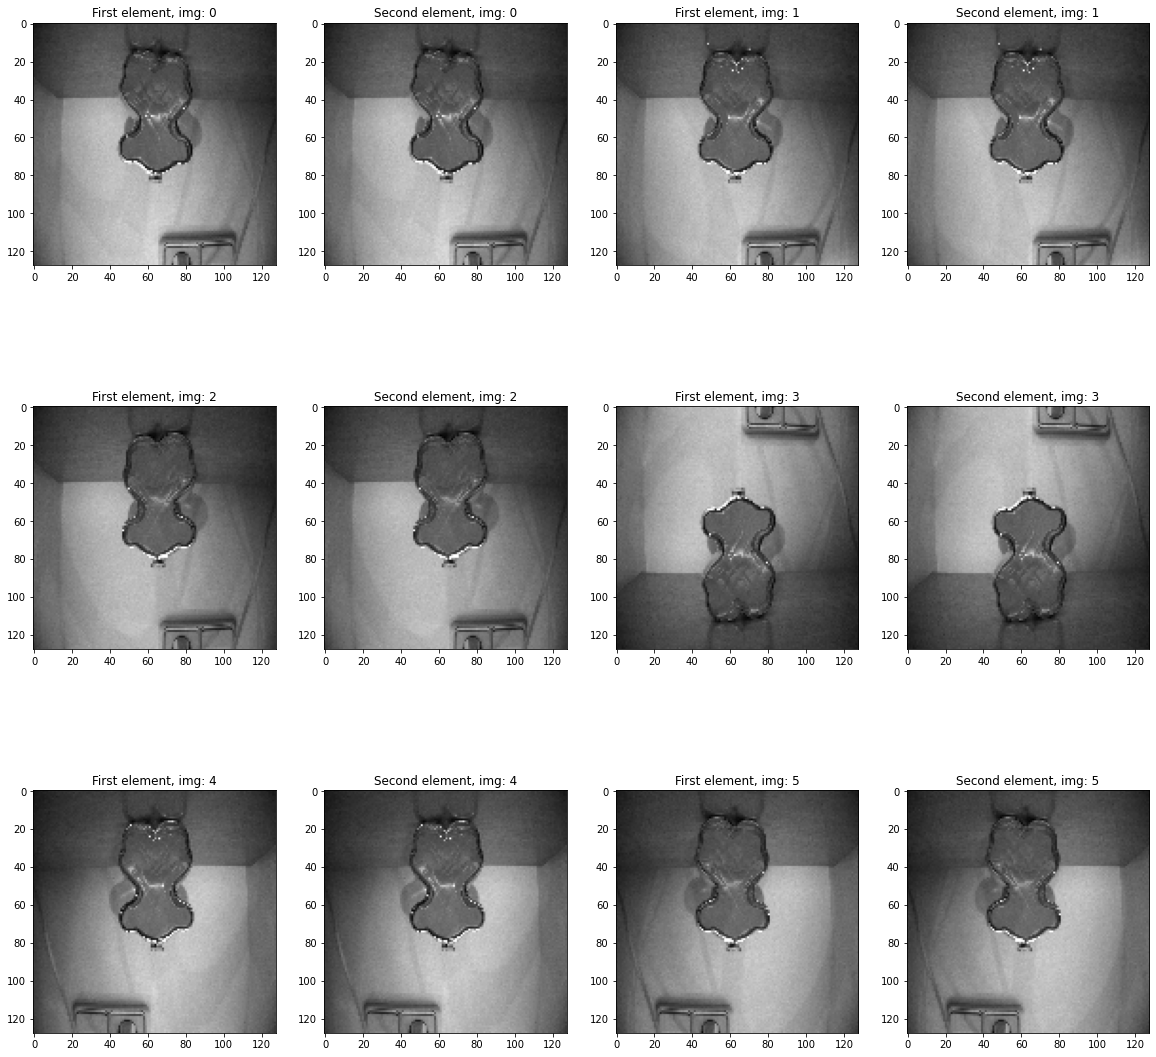

In [19]:
plt.figure(figsize=(20, 20))
for j in range(1):                        # Itertaing over ONLY the first batch
    print("Selecting batch number: ",j)
    batch_iterator = train_generator.next()
    first_element_batch = batch_iterator[0]
    second_element_batch = batch_iterator[1]
    print("The length of this element batch is: ", len(first_element_batch))
    image_to_show = 0
    for i in range(12):                         # Showing ONLY the first 12 samples of the batch
        plt.subplot(3, 4, i + 1)
        if (i % 2 == 0):
            plt.imshow(first_element_batch[image_to_show])
            plt.title("First element, img: %i" %image_to_show)
        else:
            plt.imshow(second_element_batch[image_to_show])
            plt.title("Second element, img: %i" %image_to_show)
            image_to_show = image_to_show+1

Notice that the flipping of the data augmentation made its effect on the images, however the following is worth mentioning:
- The flipping is not applied to all images. See the second and fourth images, these did not get flipped.
- Still the first and second element are the same. It means that the effect of the data augmentation is directly applied to both elements. Hence, we still don't know why we have these two elements of a batch. Only one element was expected.
- Finally, we still don't know why sometimes the length of the batch is 51.

# Configuring the Autoencoder netwrok

In [8]:
#Encoder
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoder
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0

In [9]:
500//64


7

In [13]:
#Fit the model. 
history = model.fit(
        train_generator,
        steps_per_epoch= 500 // batch_size,     # The // operator refers to a floor division, rouding down to the nearest whole number
        epochs=200,
        validation_data=validation_generator,
        validation_steps=75 // batch_size,
        shuffle = True)

Epoch 1/200
7/7 [==============================] - 8s 823ms/step - loss: 0.0403 - mse: 0.0403 - val_loss: 0.0375 - val_mse: 0.0375


See that above, the training of the model is stopped because the trainig generator did not provide the minimum number of batches for it to be trained. According to the message displayed above, the model expects at least 1400 batches.

Let's try another configuration for the model training. Here, we don't specify the steps per epoch. Resulting in a three-step long epoch, because the entire training model contains 3 batches.

In [14]:
#Fit the model. 
history = model.fit(
        train_generator,
        epochs=200,
        validation_data=validation_generator,
        shuffle = True)

Epoch 1/200
3/3 [==============================] - 6s 2s/step - loss: 0.0376 - mse: 0.0376 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 2/200
3/3 [==============================] - 5s 2s/step - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 3/200
3/3 [==============================] - 5s 2s/step - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 4/200
3/3 [==============================] - 5s 2s/step - loss: 0.0213 - mse: 0.0213 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 5/200
3/3 [==============================] - 5s 2s/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 6/200
3/3 [==============================] - 6s 2s/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 7/200
3/3 [==============================] - 5s 2s/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 8/200
3/3 [==============================] - 6s 2s/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0

According to the Keras documentation, as a paremeter to the fit() function, we can also pass a generator for its two first parameters. See the image below. See more references: <https://keras.io/api/models/model_training_apis/>

![alt text](../Image5.png "Title")

In [20]:
model_version = 'BottlesModel1'
model.save(f"../../BottlesAnomalies_TFM/models/{model_version}")

INFO:tensorflow:Assets written to: ../../BottlesAnomalies_TFM/models/BottlesModel1\assets


INFO:tensorflow:Assets written to: ../../BottlesAnomalies_TFM/models/BottlesModel1\assets


Loading the model that was previously saved


In [10]:
model = keras.models.load_model('../models/BottlesModel1')
print(type(model))

<class 'keras.engine.sequential.Sequential'>


In [32]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

The above won't be possible to show if we are loading the model. Because the data that is stored while training the model won't be stored when loading the model at once. 

Get all batches generated by the datagen and pick a batch for prediction

In [11]:
#Just to test the model. 
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
# while img_num <= len(train_generator):        #I think this should be the correct while clause
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1
    
print("number of batches are: ", img_num)


number of batches are:  3


Predict on the first batch of images. Do also notice that the prediction is being carried out over the images we used for training.

In [12]:
print(data_batch[0].shape)
predicted = model.predict(data_batch[0])  
print(predicted.shape)

(64, 128, 128, 3)
2/2 [==============================] - 1s 150ms/step
(64, 128, 128, 3)


The above is 64 length because it corresponds to the 64 predicted images of a batch. Recall that the predictions are reconstructions of the input images, since we are working with the autoencoder network.

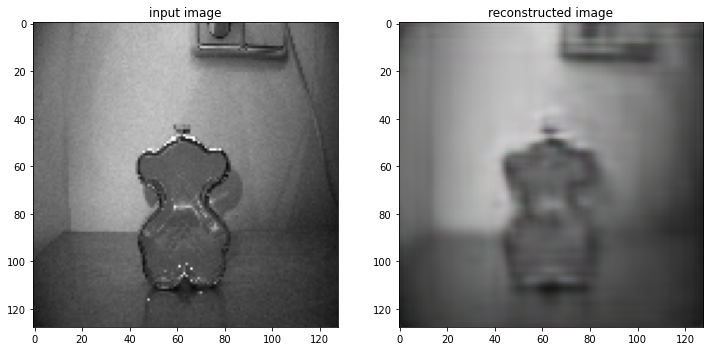

In [13]:
#Sanity check, view few images and corresponding reconstructions
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("input image")
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.title("reconstructed image")
plt.imshow(predicted[image_number])
plt.show()

As it can be seen above, the reconstruction is not that good, it is very blurry. However, we can see to generate negative artificial samples and see if these are capable of being detected as such.

Let us examine the reconstruction error between our validation data (good/normal images) and the anomaly images

In [14]:
validation_error = model.evaluate_generator(validation_generator)
print("Recon. error for the validation (normal) data is: ", validation_error)

<ipython-input-14-c517973fb429>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_error = model.evaluate_generator(validation_generator)


Recon. error for the validation (normal) data is:  [0.0027755312621593475, 0.0027755312621593475]


Here above we see a vector with two components which happen to be the same between them. This is because in the model, when we define the outputs, the loss function type and the metric are the same parameter, the mse (mean square error).

This reconstruction error above should be very low, since the validation generator is full of normal images (good images)

Whereas the reconstruction error here below, for the "anomaly_generator" should be higher, since this dataset is comprised of full anomaly images.

In [15]:
anomaly_error = model.evaluate_generator(anomaly_generator)
print("Recon. error for the anomaly data is: ", anomaly_error)

<ipython-input-15-eac880c98ec2>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  anomaly_error = model.evaluate_generator(anomaly_generator)


Recon. error for the anomaly data is:  [0.0028120658826082945, 0.0028120658826082945]


See that this error is slightly higher than the error in the validation dataset. This is good, but the difference is not that significant and this could result in wrong anomaly detections. Let's see some detections.

The following function performs:
- Initialize a vector for storing the reconstruction errors.
- A for loop that traverses all the images contained in a batch.
    - Take the one image of the batch.
    - Add a new size dimension to the image.
    - Make a prediction of the selected image with the model that was built.
    - Evaluate the performance of the prediction, i.e. compute the prediction error.
    - Append the reconstruction error into a list.
- Compute the mean and std deviation of the error.
 

In [16]:
def calc_recon_error(batch_images):   
    recon_error_list=[]
    for im in range(0, batch_images.shape[0]-1):
        img  = batch_images[im]
        img = img[np.newaxis, :,:,:]
        reconstruction = model.predict([[img]])
        reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]
        recon_error_list.append(reconstruction_error)   
    average_recon_error = np.mean(np.array(recon_error_list))  
    stdev_recon_error = np.std(np.array(recon_error_list)) 
    
    return average_recon_error, stdev_recon_error

# Testing the "calc_recon_error" function part by part the function 

For convinience make sure we are considering the firt batch, i.e the batch index 0.

In [19]:
train_batch = train_generator.next()
print(train_generator.batch_index)

0


In [20]:
train_batch = train_batch[0]
print(train_batch.shape)

(51, 128, 128, 3)


In [21]:
image = train_batch[0]
print(image.shape)

(128, 128, 3)


In [22]:
image = image[np.newaxis, :,:,:]
print(image.shape)

(1, 128, 128, 3)


In [23]:
print(type(image))

<class 'numpy.ndarray'>


In [24]:
print(type([[image]]))

<class 'list'>


We can perform the predict functino with either of these two formats. Giving the image parameter as a numpy array or as a list.

In [25]:
reconstruction = model.predict(image)

1/1 [==============================] - 0s 91ms/step


In [26]:
reconstruction = model.predict([[image]])

1/1 [==============================] - 0s 109ms/step


Now we evaluate the model performance by using the "evaluate()" function. This receives:
- The predicted output. We are sending this parameter as a list. It could also be sent as numpy array.
- The original image. Also sent as a list.
- The batch size. Refers to the number of samples per batch of computation. However, see that the result is the same when not specifying this parameter. 
    - Further check the effect of this parameter.

In [27]:
reconstruction_error = model.evaluate([reconstruction],[[image]])
print(reconstruction_error)

1/1 [==============================] - 0s 153ms/step - loss: 0.0070 - mse: 0.0070
[0.00695026945322752, 0.00695026945322752]


In [28]:
reconstruction_error = model.evaluate([reconstruction],[[image]], batch_size = 1)
print(reconstruction_error)

1/1 [==============================] - 0s 28ms/step - loss: 0.0070 - mse: 0.0070
[0.00695026945322752, 0.00695026945322752]


# Continuing with the usage of "calc_recon_error" function 

Compute the average and std dev. of recon. error for positive (anomalies) and negative samples. 
For this let us generate a batch of images for each. 

Make sure the first batch is selected for both, train and anomaly batches. For the anomalies case, notice that is not important to check this, since the anomaly dataset contains one batch only. For the train batch make sure to execute the below code block until the batch index is at 2, so that the next execution will select the batch index number 0.

In [33]:
train_batch = train_generator.next()
print(train_generator.batch_index)

2


In [34]:
anomaly_batch = anomaly_generator.next()
print(anomaly_generator.batch_index)

0


In [35]:
train_batch = train_generator.next()[0]     # This is the uninfected images
anomaly_batch = anomaly_generator.next()[0] # This is the parasitized images

good_samples_values = calc_recon_error(train_batch)
anomaly_values = calc_recon_error(anomaly_batch)

1/1 [==============================] - 0s 25ms/step - loss: 0.0059 - mse: 0.0059


In [36]:
print("The mean reconstruction error value for the good samples is: ", good_samples_values[0], " with std deviation of: ", good_samples_values[1])
print("The mean reconstruction error value for the anomalies samples is: ", anomaly_values[0], " with std deviation of: ", anomaly_values[1])


The mean reconstruction error value for the good samples is:  0.005996621940284968  with std deviation of:  0.00043887650371983276
The mean reconstruction error value for the anomalies samples is:  0.0061650553718209265  with std deviation of:  0.0006302892755465398


Based on the information shown above, we can set a threshold for discriminating good samples from anomalies ones. 

The following function does:
- Sets the reconstruction error threshold.
- Opens the given image path.
- Resizes the image 
- Depending on the image size it adds a dimension to it. The image must be at the end of this of 3 dimensions in size.
- Converts the image pixel values to float numbers, ranging from 0 to 1. 
- Adds a fourth dimension to the image.
- Performs a prediction using the model and a given image.
- Computes the prediction error.
- Depending on the prediction error it prints the message to whether the image is an anomaly or not. 

In [37]:
#Now, input unknown images and sort as Good or Anomaly
def check_anomaly(img_path):
    reconstruction_error_threshold = 0.006 # Set this value based on the above exercise
    img  = Image.open(img_path)
    img = np.array(img.resize((128,128), Image.ANTIALIAS))
    image_shape = img.shape
    if(len(image_shape)==2):
        img = np.dstack((img, img, img))
    plt.imshow(img)
    img = img / 255.
    print(img.shape)
    img = img[np.newaxis, :,:,:]
    
    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]

    if reconstruction_error > reconstruction_error_threshold:
        print("The image IS an anomaly") 
    else:
        print("The image is NOT an anomaly")

In [38]:
#Load a couple of test images and verify whether they are reported as anomalies.
import glob
anomaly_file_paths = glob.glob(r'D:\Alex2023\TFM\Images\BottleStoodUp_atNight\Anomalies\Anomalies_samples\*')
positive_file_paths = glob.glob(r'D:\Alex2023\TFM\Images\BottleStoodUp_atNight\Positive\Positive_samples\*')

# Testing part by part the "check_anomaly" function 

In [50]:
positive_file_paths[0]

'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_0.bmp'

In [51]:
img  = Image.open(positive_file_paths[0]) 
print("The original image size is: ", img.size)
print("The image datatype is: ", type(img))

The original image size is:  (1600, 1200)
The image datatype is:  <class 'PIL.BmpImagePlugin.BmpImageFile'>


After reading the image, we resize it using a resampling filter of "Image.ANTIALIAS". The resizing filter is used in geometry operations that may map multiple input pixels to a single output pixel.

In [52]:
img = np.array(img.resize((128,128), Image.ANTIALIAS))
print("The image after resizing has size: ", img.shape)
print("The image type is also converted to: ", type(img))

The image after resizing has size:  (128, 128)
The image type is also converted to:  <class 'numpy.ndarray'>


<ipython-input-52-d296bf20a90c>:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


Text(0.5, 1.0, 'Resized image and converted into numpy array')

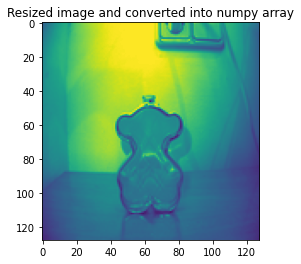

In [53]:
plt.imshow(img)
plt.title("Resized image and converted into numpy array")

From the image shown above it can be noticed that the picture does not have the 3 channels that it needs for the further training process. It is expected to fail in the prediction stage later in the code, since the input layer of the model consists of 4 elements.

Converting the pixel values to floating values ranging from 0 to 1.

In [54]:
img = img / 255.
print("The image after pixel converting the values has size: ", img.shape)

The image after pixel converting the values has size:  (128, 128)


In [55]:
img = img[np.newaxis,:,:]
print("The image shape after an additional dimension is added, is: ", img.shape)

The image shape after an additional dimension is added, is:  (1, 128, 128)


In [56]:
reconstruction = model.predict([[img]])

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "c:\Users\alexj\.conda\envs\tfm\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\alexj\.conda\envs\tfm\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\alexj\.conda\envs\tfm\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\alexj\.conda\envs\tfm\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\alexj\.conda\envs\tfm\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\tornado\ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\tornado\ioloop.py", line 741, in _run_callback
      ret = callback()
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\tornado\gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\tornado\gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
      result = self._run_cell(
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2923, in _run_cell
      return runner(coro)
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\alexj\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-56-e27482fe4c8e>", line 1, in <module>
      reconstruction = model.predict([[img]])
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\engine\training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\engine\training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\engine\training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\engine\training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
      return self(x, training=False)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\alexj\.conda\envs\tfm\lib\site-packages\keras\backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
convolution input must be 4-dimensional: [1,128,128]
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_predict_function_10444]

Fixing the image for it to be a 3-dimensional data. 

In [57]:
img  = Image.open(positive_file_paths[0]) 
print("The original image size is: ", img.size)
print("The image datatype is: ", type(img))
img = np.array(img.resize((128,128), Image.ANTIALIAS))
print("The image after resizing has size: ", img.shape)
print("The image type is also converted to: ", type(img))
img = np.dstack((img, img, img))
print("The image after resizing has size: ", img.shape)
print("The image type is also converted to: ", type(img))

The original image size is:  (1600, 1200)
The image datatype is:  <class 'PIL.BmpImagePlugin.BmpImageFile'>
The image after resizing has size:  (128, 128)
The image type is also converted to:  <class 'numpy.ndarray'>
The image after resizing has size:  (128, 128, 3)
The image type is also converted to:  <class 'numpy.ndarray'>


<ipython-input-57-93eed45617ce>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


Text(0.5, 1.0, 'Converted to 3-channel image')

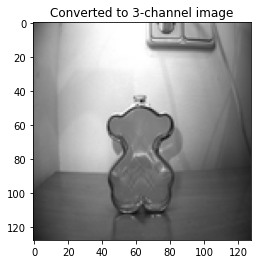

In [58]:
plt.imshow(img)
plt.title("Converted to 3-channel image")

In [59]:
img = img / 255.
img = img[np.newaxis, :,:,:]
print("The image shape after an additional dimension is added, is: ", img.shape)

The image shape after an additional dimension is added, is:  (1, 128, 128, 3)


We can now perform the prediction because the image has the desired shape

In [60]:
reconstruction = model.predict([[img]])

1/1 [==============================] - 0s 26ms/step


In [61]:
reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]
print("The reconstruction error of the chosen image is: ", reconstruction_error)

1/1 [==============================] - 0s 30ms/step - loss: 0.0073 - mse: 0.0073
The reconstruction error of the chosen image is:  0.007289513945579529


Finally, it is worth noting that when working with the positive images, the job of converting the image to 3-channel image is necessary. However, this is not necessary when working with the anomalies images; this might have something to do with the image file extension. See that the positive images have file extension ".bmp" whereas the anomalies images have ".jpg" file extension.

In [62]:
img2 = Image.open(anomaly_file_paths[0]) 
print("The original image size is: ", img2.size)
print("The image datatype is: ", type(img2))
img2 = np.array(img2.resize((128,128), Image.ANTIALIAS))
print("The image after resizing has size: ", img2.shape)
print("The image type is also converted to: ", type(img2))

The original image size is:  (1600, 1200)
The image datatype is:  <class 'PIL.JpegImagePlugin.JpegImageFile'>
The image after resizing has size:  (128, 128, 3)
The image type is also converted to:  <class 'numpy.ndarray'>


<ipython-input-62-c10db24e3933>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img2 = np.array(img2.resize((128,128), Image.ANTIALIAS))


See above, that the image already has 3-channels size: (128,128,3)

Text(0.5, 1.0, 'Resized image and converted into numpy array')

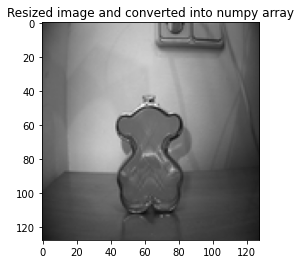

In [63]:
plt.imshow(img2)
plt.title("Resized image and converted into numpy array")



In [64]:
img2 = img2 / 255.
img2 = img2[np.newaxis, :,:,:]
print("The image shape after an additional dimension is added, is: ", img2.shape)
reconstruction_anomaly = model.predict([[img2]])
reconstruction_error_anomaly = model.evaluate([reconstruction_anomaly],[[img2]], batch_size = 1)[0]
print("The reconstruction error of the chosen image anomaly is: ", reconstruction_error_anomaly)

The image shape after an additional dimension is added, is:  (1, 128, 128, 3)
1/1 [==============================] - 0s 40ms/step - loss: 0.0061 - mse: 0.0061
The reconstruction error of the chosen image anomaly is:  0.006140316370874643


For this reason the "check_anomaly" function has an if clause that depending on the shape of the input image, it adds or not one more dimension to it.

In [65]:
img2 = Image.open(positive_file_paths[0]) 
img2 = np.array(img2.resize((128,128), Image.ANTIALIAS))
print("The image after resizing has size: ", img2.shape)
image_shape = img2.shape
print(len(image_shape))


The image after resizing has size:  (128, 128)
2


<ipython-input-65-519d1e969a61>:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img2 = np.array(img2.resize((128,128), Image.ANTIALIAS))


In [66]:
print("The image size is: ", img2.shape)
if(len(image_shape)==2):
    img2 = np.dstack((img2, img2, img2))
print("The image size is: ", img2.shape)

The image size is:  (128, 128)
The image size is:  (128, 128, 3)


# Continuing with the usage of "check_anomaly" function 

Checking the anomalies

(128, 128, 3)
1/1 [==============================] - 0s 30ms/step - loss: 0.0055 - mse: 0.0055


<ipython-input-37-5527e89f63b9>:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


The image is NOT an anomaly
This image directory is:  D:\Alex2023\TFM\Images\BottleStoodUp_atNight\Anomalies\Anomalies_samples\img5.jpg


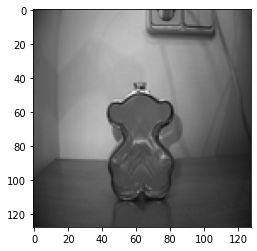

In [39]:
num=random.randint(0,len(anomaly_file_paths)-1)
check_anomaly(anomaly_file_paths[num])
print("This image directory is: ", anomaly_file_paths[num])

Checking the positive samples, these are NOT supposed to be anomalies.

(128, 128, 3)
1/1 [==============================] - 0s 30ms/step - loss: 0.0061 - mse: 0.0061


<ipython-input-37-5527e89f63b9>:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


The image IS an anomaly
This image directory is:  D:\Alex2023\TFM\Images\BottleStoodUp_atNight\Positive\Positive_samples\07-03-2023 - 22.58.47_18.bmp


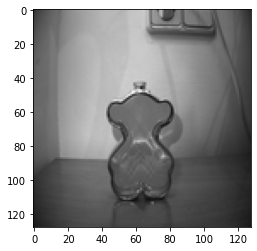

In [40]:
num=random.randint(0,len(positive_file_paths)-1)
check_anomaly(positive_file_paths[num])
print("This image directory is: ", positive_file_paths[num])

From the specific tests above, the model has succesfully discriminated negative samples from the positive ones. However, varifying various images, it was seen that the performance is poor. Next we will label the images so that we can better analyze the results of all of them.

# Labeling the images

Creating the anomalies samples with their correspondant labels

In [41]:
anomalies_labels = np.ones(6)
print(anomalies_labels)

[1. 1. 1. 1. 1. 1.]


In [42]:
anomalies_samples = (anomaly_file_paths,anomalies_labels)

In [43]:
print("These are the anomalies links: ", anomalies_samples[0])
print("These are the anomalies labels: ", anomalies_samples[1])

These are the anomalies links:  ['D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img1.jpg', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img2.jpg', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img3.jpg', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img4.jpg', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img5.jpg', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img6.jpg']
These are the anomalies labels:  [1. 1. 1. 1. 1. 1.]


Creating the positive samples with their correspondant labels

In [44]:
positive_labels = np.zeros(len(positive_file_paths))
print(positive_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [45]:
positive_samples = (positive_file_paths,positive_labels)
print("These are the positive links: ", positive_samples[0])
print("These are the positive labels: ", positive_samples[1])

These are the positive links:  ['D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_0.bmp', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_1.bmp', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_10.bmp', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_11.bmp', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_12.bmp', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_13.bmp', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_14.bmp', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_15.bmp', 'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 

Creating a new function baed on "check_anomaly()" that outputs directly the predicted label of the given image. This function is called predict_label()

In [46]:
def predict_label(img_path):
    reconstruction_error_threshold = 0.006
    img  = Image.open(img_path)
    img = np.array(img.resize((128,128), Image.ANTIALIAS))
    image_shape = img.shape
    if(len(image_shape)==2):
        img = np.dstack((img, img, img))
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]
    if reconstruction_error > reconstruction_error_threshold:
        prediction = 1 
    else:
        prediction = 0
    return prediction

In [47]:
num=random.randint(0,len(positive_file_paths)-1)
model_prediction = predict_label(positive_samples[0][num])
model_label = int(positive_samples[1][num])
print("The model predicts that the given image is: ", model_prediction)
print("The original label of the given image is: ", model_label)

1/1 [==============================] - 0s 27ms/step


<ipython-input-46-e2362942be8e>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


1/1 [==============================] - 0s 31ms/step - loss: 0.0057 - mse: 0.0057
The model predicts that the given image is:  0
The original label of the given image is:  0


# Using some metrics for evaluating model predictions

In [48]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, SpecificityAtSensitivity
from sklearn.metrics import f1_score

## Using the positive samples set. All images are NON-ANOMALIES bottles

We will see first, the precision of the training dataset, which consists on full positive images, i.e. image of bottles without anomalies, their labels are full zeros. 

In [49]:
positive_samples

(['D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_0.bmp',
  'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_1.bmp',
  'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_10.bmp',
  'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_11.bmp',
  'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_12.bmp',
  'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_13.bmp',
  'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_14.bmp',
  'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_15.bmp',
  'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Positive\\Positive_samples\\07-03-2023 - 22.28.40_16.

In [50]:
print(len(positive_samples[1]))

179


In [51]:
predictions_list = [] 
labels_list = [] 
for i in range(len(positive_file_paths)-1):
    model_prediction = predict_label(positive_samples[0][i])
    model_label = int(positive_samples[1][i])
    predictions_list.append(model_prediction)  
    labels_list.append(model_label)

1/1 [==============================] - ETA: 0s

<ipython-input-46-e2362942be8e>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


1/1 [==============================] - 0s 27ms/step - loss: 0.0058 - mse: 0.0058


In [80]:
print(predictions_list)

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]


### The Precision metric

In [81]:
pre = Precision()

This metric simply divides true_positives by the sum of true_positives and false_positives.

In [82]:
pre = Precision()
pre.update_state([0, 1, 1, 1], [1, 0, 1, 1])
pre.result().numpy()

0.6666667

See above that:
- Number of true positives elemnts: 2. The last two "1"s of the second vector.
- Number of false positives: 1. The first "1" of the second vector. 

Then, the precision value of this prediction is: 

= 2/(2+1)

= 0.66667

Below, we have another example of the Precision function. This time it is using the "sample_weight" parameter. This is a mask, wherever there is a "1" the precision metric will be computed.

In [83]:
pre.reset_state()
pre.update_state([0, 1, 1, 1], [1, 0, 1, 1], sample_weight=[1, 1, 1, 0])
pre.result().numpy()

0.5

A final test of the Precision metric before applying it to the real data we are working with.

Notice this case below. The ground truth, the first vector is telling us that there ALL of these samples are positive, i.e. these are normal bottles, bottles without any anomalies.

In [84]:
pre.reset_state()
pre.update_state([0, 0, 0, 0], [1, 0, 0, 1])
pre.result().numpy()

0.0

And the precision value is zero. This is because:
- True positives = 0 
- False positives = 2

Then Precision = 0/(0+2) = 0

Interpreting this result: From all the samples that the model predicted to be anomaly bottles, all of them are wrong predictions. This is because we know that all the bottles were in reality, positive samples, not anomalies at all. 

Let's see the effect of fliping the values of the vectors. Do we arrive to the same conclusion?

In [85]:
pre.reset_state()
pre.update_state([1 ,1 ,1, 1], [0, 1, 1, 0])
pre.result().numpy()

1.0

Now, the precision value is 1. Since:
- True positives = 2
- False positives = 0

Then Precision = 2/(2+0) = 1

This can be interpreted as: Since we have flipped the values, now 0 stands for bottles WITH anomalies and 1 stands for bottles WITHOUT anomalies. Hence, the model has 100% precision at the moment of predicting bottles WITHOUT anomalies. From all the bottles that the model predicted were bottles without anomalies (two bottles), all of them were correct predictions. 

From the tests above, it is clear that we want to see the precision of the model at the moment of predicting bottles WITH anomalies, hence we do:

In [86]:
pre.reset_state()
pre.update_state(labels_list, predictions_list)
pre.result().numpy()

0.0

In [87]:
print(predictions_list)

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]


As it can be seen the precision is 0%. That is because the model has predicted that some of the bottles DO HAVE anomalies where we know that in reality none of the bottles have any anomaly. 

It is also important to highlight that the optimal case would have been for example:

Ground truth: [0,0,0,0]
Predicted labels: [0,0,0,0]

True positives = 0
False positives = 0
Precision = 0/(0+0) = 0

Leading us to the conclusion that given this case, where all the samples of the ground truth are NOT anomaly bottles, the precision metric by its own might not be enough for explaining the truth performance of the model. 

In [88]:
pre.reset_state()
pre.update_state([0,0,0,0], [0, 0, 0, 0])
pre.result().numpy()

0.0

### The Recall metric

In [89]:
re = Recall()

The recall metric tells us: out of all the positive examples, how many were predicted as positive? This metric is also called "sensitiviy" and TPR "True Positive Rate". It responds how good is the model at catching YESes?

Remember we still working the dataset of full positive samples, i.e. bottles WITHOUT anomalies.

In [90]:
re.update_state([0,1,1,0], [1, 0, 1, 0])
re.result().numpy()

0.5

See above that:
- Number of true positives elemnts: 1. The "1" of the third position of the second vector.
- Number of false negatives: 1. The "0" of the second position of the second vector. 

Then, the recall value of this prediction is: 

= 1/(1+1)

= 0.5

See this other example. Since we do not have any true positive, the recall metric will remain zero.

In [91]:
re.reset_state()
re.update_state([0,0,0,0], [0,0,1,0])
re.result().numpy()

0.0

Flipping the values. Now the ANOMALIES bottles are represented by 0 and the NO-ANOMALIES bottles are represented by 1

In [92]:
re.reset_state()
re.update_state([1,1,1,1], [1,1,0,1])
re.result().numpy()

0.75

See above that:
- Number of true positives elemnts: 3.
- Number of false negatives: 1. 

Recall = 3 / (3+1) = 0.75

We have a recall of 75% of detecting bottles WITHOUT anomalies.

Let's now check with the dataset of this project.

In [93]:
re.reset_state()
re.update_state(labels_list, predictions_list)
re.result().numpy()

0.0

In [94]:
print(predictions_list)

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]


Since we do not have any true positive the recall value is still 0 for this case. 

And it happens the same as in the Precision metric. See the example below:

In [95]:
re.reset_state()
re.update_state([0,0,0,0], [0,0,0,0])
re.result().numpy()

0.0

Above is shown a fully correct prediction. But still the recall value is zero. This is because no positive sample is present in the ground truth.

### The Specificity metric

The specificity metric is the opposite as sensitivity, it tells us how good is the model at catching NOes. It measures the proportion of actual negatives that are correctly identified as such.

Specificity = (tn / (tn + fp))

As we are working in here with full NOes, that is bottles WITHOUT anomalies, perhaps this would be a good metric for this case.

In [96]:
spec = SpecificityAtSensitivity(0.5)  # Not completely sure why to input 0.5 for specificity computation

In [97]:
spec.update_state([0,1,1,0], [1, 0, 1, 0])
spec.result().numpy()

0.5

The examples above consists on:
- True negative detections: 1.
- False positive detections: 1.

Specificity = 1/(1+1) = 0.5

But it does not work very well with other examples. See:

In [98]:
spec.reset_state()
spec.update_state([0,0,0,0], [0,1,0,0])
spec.result().numpy()

0.0

The above result should be:
- True negative detections: 3.
- False positive detections: 1.

Specificity = 3/(3+1) = 0.75

Hence, for the moment the computation of the specificity will be made with an alternative function.

#### Trying the sklearn library for specificity

In [99]:
from sklearn.metrics import confusion_matrix
import math

tn, fp, fn, tp = confusion_matrix([0,1,1,0], [1, 0, 1, 0]).ravel()
specificity_val = tn/(tn+fp)
if(math.isnan(specificity_val)):
    specificity_val = 0
print("The specificity value is: ", specificity_val)


The specificity value is:  0.5


Above works according to the expected. See another example:

In [100]:
tn, fp, fn, tp = confusion_matrix([0,0,0,0], [0,1,0,0]).ravel()
specificity_val = tn/(tn+fp)
if(math.isnan(specificity_val)):
    specificity_val = 0
print("The specificity value is: ", specificity_val)

The specificity value is:  0.75


Above as well, it is the expected specificity value. Now try with the actual data of the project.

In [101]:
tn, fp, fn, tp = confusion_matrix(labels_list, predictions_list).ravel()
specificity_val = tn/(tn+fp)
if(math.isnan(specificity_val)):
    specificity_val = 0
print("The specificity value is: ", specificity_val)

The specificity value is:  0.5393258426966292


The model has 53.93% of specificity metric detection. This means that, when it comes to detect normal bottles, that is, bottles without anomalies, the model performs it well in 53.93% of the predicitons.

### The Accuracy metric

In [102]:
acc = BinaryAccuracy()

Compute the frequency with which y_pred matches y_true.

In [103]:
acc.update_state([0,1,1,0], [1, 0, 1, 0])
acc.result().numpy()

0.5

Above we can see:
- The last two numbers match values.
- There are four numbers in total.

Accuracy = 2/4 = 0.5

Applying this to the dataset we are working with:

In [104]:
acc.reset_state()
acc.update_state(labels_list, predictions_list)
acc.result().numpy()

0.53932583

It outputs a 53.93% of accuracy.

### The Confusion Matrix

In [105]:
from sklearn.metrics import confusion_matrix

Having the predicted and true labels we can generate the confustion matrix. 

In [106]:

# result = confusion_matrix(labels_list, predictions_list,normalize='pred') #Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(labels_list, predictions_list)
print(result)

[[96 82]
 [ 0  0]]


Now, to plot the confusion matrix in a very comprehensive way, we use:

In [108]:
import seaborn as sn
import pandas as pd

Text(0.5, 15.0, 'Predicted label')

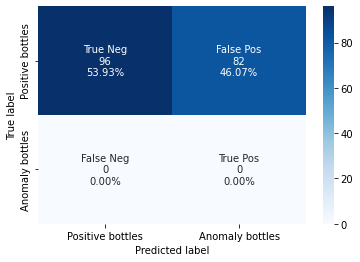

In [109]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     result.flatten()/np.sum(result)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]        #To print the group names as well 
# labels = [f"{v1}\n{v2}" for v1, v2 in
#           zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
categories = ['Positive bottles', 'Anomaly bottles']
sn.heatmap(result, annot=labels, fmt='', xticklabels=categories,yticklabels=categories, cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

From above, we can see that the model correctly classifies the positive samples, that is, the bottles without anomalies (96 correctly classified). On the other hand, the classifications for anomaly bottles, the model incorrectly classifies 82 samples as anomalies when it should be positive samples.

### The F1 score

This metric is used for creating a great compromise between recall and precision so that you don’t get extreme cases. Consider this example: 

5 pictures of dog, 995 pictures of anything else (imbalanced). We get a classifier running, and it correctly gets one of those dog pictures classified, but calls everything else not-a-dog. That means there are 4 incorrectly classified pictures of dogs. Recall is 0.2 (pretty bad) and precision is 1.0 (perfect), but accuracy, clocking in at 0.999, isn’t reflecting how badly the model did at catching those dog pictures; F1 score, equal to 0.33, is capturing the poor balance between recall and precision.

In [110]:
# f1 = f1_score([1,0,0,0,0,0,0,0,0,0], [1,1,1,1,1,1,1,1,1,1], average='weighted')
f1 = f1_score([1,0,0,0,0,0,0,0,0,0], [1,1,1,1,1,1,1,1,1,1])
print(f1)

0.18181818181818182


The above, had a precision of:

In [111]:
pre.reset_state()
pre.update_state([1,0,0,0,0,0,0,0,0,0], [1,1,1,1,1,1,1,1,1,1])
pre.result().numpy()

0.1

And a recall of:

In [112]:
re.reset_state()
re.update_state([1,0,0,0,0,0,0,0,0,0], [1,1,1,1,1,1,1,1,1,1])
re.result().numpy()

1.0

See that the F1 score presents a balance between the extreme cases of precision and recall.

Now, let's see the F1 score for the data of our project.

In [113]:
f1 = f1_score(labels_list, predictions_list)
print(f1)

0.0


Since precision and recall metrics for this case were equal to zero, then the F1 score for this dataset is as well zero. 

Let's see why it was zero, both of them precisoin and recall metrics!@!!!!!

### The ROC curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate.
- False Positive Rate.

As this metric works with a proabability output value, we will have to write a new function for our predictions to output one such value. For the moment we have the "predict_label()" function that, working with a threshold reconstruction error, outputs a prediction of the label, either "1" or "0". Hence, given this situation we have the following possibilites to approach this task:

- Option 1: Map the "reconstruction_error" of each prediction to a probability percentage that ranges from 0 to 100%, where, of course, 100% will correspond to a completely certain prediction. 
- Option 2: Considering the "reconstruction_error_threshold" as the threshold to be varying for the ROC to be built. 


#### Implementing Option 1

First, let's see the error values that the predictions output.

In [52]:
def output_error(img_path):
    img  = Image.open(img_path)
    img = np.array(img.resize((128,128), Image.ANTIALIAS))
    image_shape = img.shape
    if(len(image_shape)==2):
        img = np.dstack((img, img, img))
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]
    return reconstruction_error

In [53]:
errors_list = []
for i in range(len(positive_file_paths)-1):
    error_value = output_error(positive_samples[0][i])
    errors_list.append(error_value)  


1/1 [==============================] - ETA: 0s

<ipython-input-52-16681a86e1d9>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


1/1 [==============================] - 0s 26ms/step - loss: 0.0058 - mse: 0.0058


The list that contains all the error values is computed. Let's plot it to have an idea of how spread these values are.

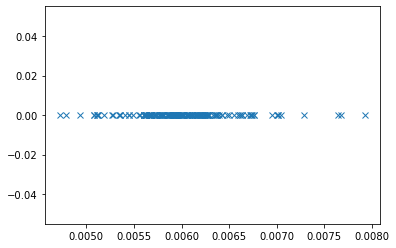

In [54]:
val = 0. # this is the value where you want the data to appear on the y-axis.
plt.plot(errors_list, np.zeros_like(errors_list) + val, 'x')
plt.show()

And some description of the errors list is:

In [55]:
average_recon_error = np.mean(np.array(errors_list))  
stdev_recon_error = np.std(np.array(errors_list)) 
min_prob = np.min(errors_list)
max_prob = np.max(errors_list)

print("The average of the errors list is: ", average_recon_error)
print("The standard deviation of the errors list is: ", stdev_recon_error)
print("The min value of the errors list is: ", min_prob)
print("The max value of the errors list is: ", max_prob)

The average of the errors list is:  0.006008613043663542
The standard deviation of the errors list is:  0.0004896238276767876
The min value of the errors list is:  0.004726245068013668
The max value of the errors list is:  0.007921397686004639


Having looked at the data points of the errors, the average and the standard deviation of it, we can map the errors to be a percentage probability in the following manner:

- 0.004726, which is the minimum error, can represent a 100% probability of predicting the image as a non-anomaly bottle.
- 0.007921, which is the maximum error, can represent a 60% probability of predicting the image as a non-anomaly bottle. 

The above conclusion is stated because we know we are working with only non-anomaly bottles. Hence, those error values correspond, all of them, to non-anomaly bottles; even the image that outputed the maximum error value must be predicted to be a non-anomaly bottle. 


Moreover, it would be interesting to see as well a plot of the error values of the images that are indeed anomaly bottles. Let's plot them.

In [56]:
errors_list_anomalies = []
for i in range(len(anomaly_file_paths)-1):
    error_value = output_error(anomalies_samples[0][i])
    errors_list_anomalies.append(error_value)  

1/1 [==============================] - 0s 32ms/step - loss: 0.0061 - mse: 0.0061


<ipython-input-52-16681a86e1d9>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


1/1 [==============================] - 0s 32ms/step - loss: 0.0055 - mse: 0.0055


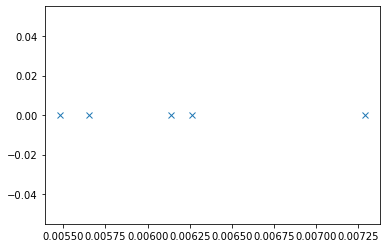

In [57]:
val = 0. # this is the value where you want the data to appear on the y-axis.
plt.plot(errors_list_anomalies, np.zeros_like(errors_list_anomalies) + val, 'x')
plt.show()

In [62]:
average_recon_error = np.mean(np.array(errors_list_anomalies))  
stdev_recon_error = np.std(np.array(errors_list_anomalies)) 
min_prob = np.min(errors_list_anomalies)
max_prob = np.max(errors_list_anomalies)

print("The average of the errors list is: ", average_recon_error)
print("The standard deviation of the errors list is: ", stdev_recon_error)
print("The min value of the errors list is: ", min_prob)
print("The max value of the errors list is: ", max_prob)

The average of the errors list is:  0.006164939794689417
The standard deviation of the errors list is:  0.0006320773905360641
The min value of the errors list is:  0.005481232423335314
The max value of the errors list is:  0.007286042906343937


Let's plot both of the errors values in the same figure.

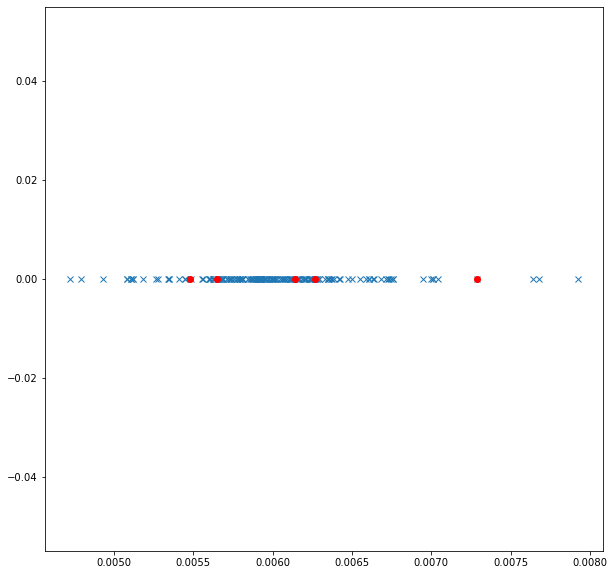

In [61]:
plt.figure(figsize=(10, 10))
val = 0. # this is the value where you want the data to appear on the y-axis.
plt.plot(errors_list, np.zeros_like(errors_list) + val, 'x')
plt.plot(errors_list_anomalies, np.zeros_like(errors_list_anomalies) + val, 'ro')
plt.show()

As we can see above, we have a problem. The error values of the anomaly bottles are mixed with the error values of the non-anomaly bottles. It is difficult to draw a line to divide these two categories. However, we can consider of focusing only in the part where most of the non-anomaly bottles error values lie on, that is, if an error value lies into the Guassian distribution of the non-anomaly errors distribution, then it will have more probability of being predicted as such. If the error value lies outside the Gaussian distribution, then the percentage of being detected as such should decrease.

Let's code some function that if:
- The error value is 0.006, which is exactly the average of the non-anomaly distribution, then it should have a 100% probability of being detected as such.
- The error value is 0.006 +/- 0.00049 then the probability of being detected as a non-anomaly bottle is 0%.

The above data is based on the Gaussian distribution of the non-anomaly bottles errors. 

In [66]:
def map_value_to_gaussian(value):
    # Calculate the mean and standard deviation
    mean = 0.006
    std_dev = 0.00049

    # Work with the absolute value of the difference!!!!!!!!!!!!!!!!!!
    
    # Calculate the z-score of the value
    z_score = (value - mean) / std_dev
    
    # Check if the value is outside the range of the Gaussian distribution
    if z_score < -3 or z_score > 3:
        mapped_value = 0
    else:
        # Use the cumulative distribution function of the standard normal distribution to map the z-score to a percentile
        percentile = 0.5 * (1 + math.erf(z_score / math.sqrt(2)))
        
        # Map the percentile to a value from 0 to 100
        mapped_value = percentile * 100
    
    # If the value is at the mean of the Gaussian distribution, set the mapped value to 100
    if value == mean:
        mapped_value = 100
        
    return mapped_value

In [69]:
print(map_value_to_gaussian(0.0065))

84.62325380313978


## Using the anomalies samples set. All images are ANOMALIES bottles

In [114]:
anomalies_samples

(['D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img1.jpg',
  'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img2.jpg',
  'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img3.jpg',
  'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img4.jpg',
  'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img5.jpg',
  'D:\\Alex2023\\TFM\\Images\\BottleStoodUp_atNight\\Anomalies\\Anomalies_samples\\img6.jpg'],
 array([1., 1., 1., 1., 1., 1.]))

In [115]:
predictions_list = [] 
labels_list = [] 
for i in range(len(anomaly_file_paths)-1):
    model_prediction = predict_label(anomalies_samples[0][i])
    model_label = int(anomalies_samples[1][i])
    predictions_list.append(model_prediction)  
    labels_list.append(model_label)

1/1 [==============================] - 0s 31ms/step - loss: 0.0061 - mse: 0.0061


<ipython-input-74-e2362942be8e>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


1/1 [==============================] - 0s 33ms/step - loss: 0.0055 - mse: 0.0055


In [116]:
print(predictions_list)

[1, 1, 0, 1, 0]


### The Precision metric

In [117]:
pre = Precision()

In [118]:
pre.reset_state()
pre.update_state(labels_list, predictions_list)
pre.result().numpy()

1.0

In [119]:
print("This is the ground truth list: ", labels_list)
print("This is the prediction list: ", predictions_list)

This is the ground truth list:  [1, 1, 1, 1, 1]
This is the prediction list:  [1, 1, 0, 1, 0]


See that from all the elements that the model has predicted to be positive, all of them are correct, that is why the precision value of this model is 100%.

### The Recall metric

In [120]:
re = Recall()

In [121]:
re.reset_state()
re.update_state(labels_list, predictions_list)
re.result().numpy()

0.6

In [122]:
print("This is the ground truth list: ", labels_list)
print("This is the prediction list: ", predictions_list)

This is the ground truth list:  [1, 1, 1, 1, 1]
This is the prediction list:  [1, 1, 0, 1, 0]


See that because of the two false negatives, the recall value becomes:

recall = 3 / (3+2) = 0.6

### The Specificity metric

In [123]:
tn, fp, fn, tp = confusion_matrix(labels_list, predictions_list).ravel()
specificity_val = tn/(tn+fp)
if(math.isnan(specificity_val)):
    specificity_val = 0
print("The specificity value is: ", specificity_val)

The specificity value is:  0


<ipython-input-123-2f46093a5cd2>:2: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity_val = tn/(tn+fp)


The model has 0% of specificity metric detection. This makes sense since in the dataset there does not exist any bottle without anomaly, i.e. no true negative value could be included for the computation. In this kind of dataset, a better metric to look at is the recall metric.

### The Accuracy metric

In [124]:
acc = BinaryAccuracy()

In [125]:
acc.reset_state()
acc.update_state(labels_list, predictions_list)
acc.result().numpy()

0.6

It outputs a 60% of accuracy.

### The Confusion Matrix

Having the predicted and true labels we can generate the confustion matrix. 

In [126]:

# result = confusion_matrix(labels_list, predictions_list,normalize='pred') #Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(labels_list, predictions_list)
print(result)

[[0 0]
 [2 3]]


Now, to plot the confusion matrix in a very comprehensive way, we use:

Text(0.5, 15.0, 'Predicted label')

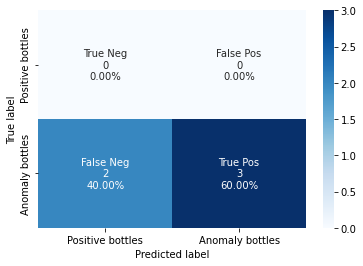

In [127]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     result.flatten()/np.sum(result)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]          #To print the group names as well 
# labels = [f"{v1}\n{v2}" for v1, v2 in
#           zip(group_counts,group_percentages)]                    #For printing without the group names labels                    

labels = np.asarray(labels).reshape(2,2)
categories = ['Positive bottles', 'Anomaly bottles']
sn.heatmap(result, annot=labels, fmt='', xticklabels=categories,yticklabels=categories, cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

From above, we can see that the model correctly classifies the anomaly bottles (3 true positives). On the other hand, the classifications for bottles without anomalies, the model incorrectly classifies 2 of them; it classifies as bottles without anomalies where in reality these are bottles with anomalies.

# Working on the latent space of the model

This is a different approach of setting a threshold and detecting an anomaly. Instead of working directly with the error metric at the end of the model, it will be reached until the latent space of the model and in here a threshold value will be selected.

Let us extract (or build) the encoder network, with trained weights.

This is used to get the compressed output (latent space) of the input image. 

The compressed output is then used to calculate the KDE

In [19]:
encoder_model = Sequential()
encoder_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3), weights=model.layers[0].get_weights()) )
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', weights=model.layers[2].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(16, (3, 3), activation='relu', padding='same', weights=model.layers[4].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 16)      

NOtice that the new model: "encoder_model" is the same as "model" but without considering the decoder part of it, only the encoder part. 

It is now time to use this new model. This will generate a feature vector or also called by the video source of this notebook, the latent vector.

In [20]:
########################################################
# Calculate KDE using sklearn
from sklearn.neighbors import KernelDensity

#Get encoded output of input images = Latent space
encoded_images = encoder_model.predict_generator(train_generator)

C:\Users\Alex\AppData\Local\Temp\ipykernel_8136\454703430.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  encoded_images = encoder_model.predict_generator(train_generator)


In [21]:
print(encoded_images.shape)

(13704, 16, 16, 16)


See that it is 13704 length because it corresponds to all the images that belong to the training dataset. Also the shape of the representation of the original images has been lowered to (16, 16, 16) as specified in the model structure. 
 

In [22]:
type(encoded_images)

numpy.ndarray

Now we will flatten the encoder output because KDE from sklearn takes 1D vectors as input

First we print the output shape of the encoder model

In [23]:
encoder_output_shape = encoder_model.output_shape #Here, we have 16x16x16
print(encoder_output_shape)

(None, 16, 16, 16)


Then we flatten the output of the enconded images in order for it to be (13704, 16 * 16 * 16)

In [24]:
out_vector_shape = encoder_output_shape[1]*encoder_output_shape[2]*encoder_output_shape[3]
encoded_images_vector = [np.reshape(img, (out_vector_shape)) for img in encoded_images]


In [25]:
len(encoded_images_vector)

13704

In [26]:
encoded_images_vector[0].shape

(4096,)

Now, let's fit KDE to the image latent data


In [27]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(encoded_images_vector)

The above function fits a kernel density estimation to the data that is provided, that is, the "encoded_images_vector" variable. It does so using a Guassian kernel of bandwidth 0.2.

The badnwidth parameter affects on how the selected kernel will fit each sample of the given data. For example for the case in which the kernel is a Gaussian distribution, the bandwidth parameter would affect in how thin or wide is the Gaussian distribution.

At this point in the variable "kde" we have some numbers that are the result of fitting Gaussian functions to the given data points in the variable "encoded_images_vecotr". We will use the "kde" variable later for scoring with it, some given data points; the scoring will be given depending on how similar are the given data points to the ones that it had estimated.

In [30]:
#Calculate density and reconstruction error to find their means values for
#good and anomaly images. 
#We use these mean and sigma to set thresholds. 
def calc_density_and_recon_error(batch_images):
    
    density_list=[]
    recon_error_list=[]
    for im in range(0, batch_images.shape[0]-1):
        
        img  = batch_images[im]
        img = img[np.newaxis, :,:,:]
        encoded_img = encoder_model.predict([[img]]) # Create a compressed version of the image using the encoder
        encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] # Flatten the compressed image
        density = kde.score_samples(encoded_img)[0] # get a density score for the new image
        reconstruction = model.predict([[img]])
        reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]
        density_list.append(density)
        recon_error_list.append(reconstruction_error)
    average_density = np.mean(np.array(density_list))  
    stdev_density = np.std(np.array(density_list)) 
    
    average_recon_error = np.mean(np.array(recon_error_list))  
    stdev_recon_error = np.std(np.array(recon_error_list)) 
    
    return average_density, stdev_density, average_recon_error, stdev_recon_error

The function above, given a batch of images, does:
- Encodes a single image.
- Flattens the encoded image.
- Assign a density score of the flattened image using the previously computed "kde" variable.
- Computes a reconstruction error of the image. For this it uses the complete neural network model, the one that was created at the beginning. 
- Appends in two lists:
    - The reconstruction error.
    - The density score of the encoded model result.
- At the end, based on the density and reconstruction error, the funtion otuputs the mean and standard deviation of both metrics.

In [31]:
#Get average and std dev. of density and recon. error for uninfected and anomaly (parasited) images. 
#For this let us generate a batch of images for each. 
train_batch = train_generator.next()[0]     # This is the uninfected images
anomaly_batch = anomaly_generator.next()[0] # This is the parasitized images

uninfected_values = calc_density_and_recon_error(train_batch)
anomaly_values = calc_density_and_recon_error(anomaly_batch)



1/1 [==============================] - 0s 37ms/step - loss: 0.0058 - mse: 0.0058


See that "uninfected_values" and "anomaly_values" have length of four and contain the average_density, stdev_density, average_recon_error, stdev_recon_error

In [35]:
print(uninfected_values)
print(anomaly_values)

(2818.7600142837364, 7.087883489561854e-12, 0.005494946303466956, 0.0009135791106844122)
(1635.4463236000852, 1167.4125009720128, 0.0068234895755137715, 0.0013553442590894956)


In [56]:
#Now, input unknown images and sort as Good or Anomaly
def check_anomaly(img_path):
    density_threshold = 2500 #Set this value based on the above exercise
    reconstruction_error_threshold = 0.006 # Set this value based on the above exercise
    img  = Image.open(img_path)
    img = np.array(img.resize((128,128), Image.ANTIALIAS))
    plt.imshow(img)
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    encoded_img = encoder_model.predict([[img]]) 
    encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] 
    density = kde.score_samples(encoded_img)[0] 

    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]

    if density < density_threshold or reconstruction_error > reconstruction_error_threshold:
        print("The image is an anomaly")
        
    else:
        print("The image is NOT an anomaly")
      

In [43]:
#Load a couple of test images and verify whether they are reported as anomalies.
import glob
para_file_paths = glob.glob(r'C:\Users\Alex\Documents\TFM_project\cellsDataset\cell_images\parasitized1\Parasitized\*')
uninfected_file_paths = glob.glob(r'C:\Users\Alex\Documents\TFM_project\cellsDataset\cell_images\uninfected1\Uninfected\*')

1/1 [==============================] - 0s 30ms/step


C:\Users\Alex\AppData\Local\Temp\ipykernel_8136\349380335.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


1/1 [==============================] - 0s 40ms/step - loss: 0.0056 - mse: 0.0056
The image is an anomaly


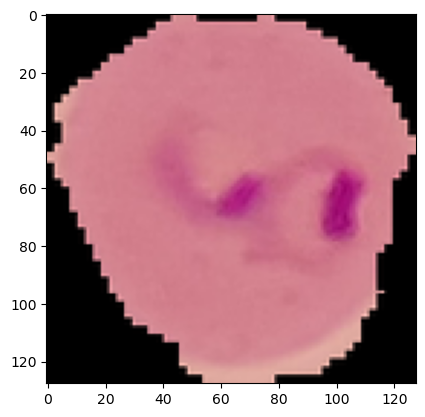

In [45]:
#Anomaly image verification
num=random.randint(0,len(para_file_paths)-1)
check_anomaly(para_file_paths[num])

1/1 [==============================] - 0s 32ms/step


C:\Users\Alex\AppData\Local\Temp\ipykernel_8136\3669532084.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = np.array(img.resize((128,128), Image.ANTIALIAS))


1/1 [==============================] - 0s 32ms/step - loss: 0.0059 - mse: 0.0059
The image is NOT an anomaly


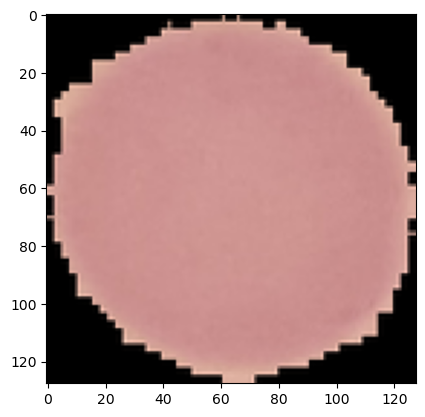

In [57]:
#Good/normal image verification
num=random.randint(0,len(uninfected_file_paths)-1)
check_anomaly(uninfected_file_paths[num])